## Figures from Aldridge 1990

Implements the function:

$$ w(t) = AH(t) t^n \mathrm{e}^{-\alpha t} \cos(2 \pi f_0 t + \phi_0) $$

from Aldridge (1990). The Berlage wavelet. _GEOPHYSICS_ **55** (11), p 1508-1511, [DOI: 10.1190/1.1442799](https://library.seg.org/doi/10.1190/1.1442799)

We'll define the function, add it to `bruges` library, and reproduce at least Figure 1. The other stuff &mdash; e.g. computing mean arrival time and total energy &mdash; will have to wait. I think we can leave Hilbert and Fourier transforms to the rest of scipy, no need to do these analytically. 

In [25]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

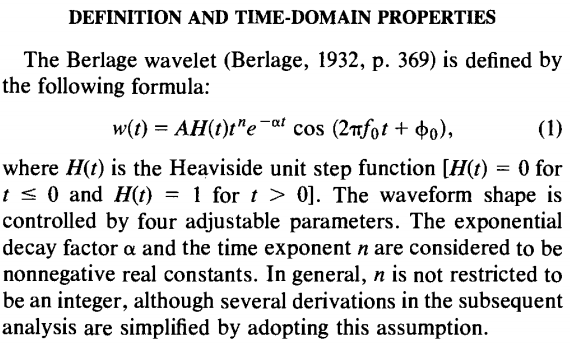

In [5]:
from IPython.display import Image
Image("./berlage_definition.png")

In [35]:
duration = 0.256
dt = 0.001
f = 30
alpha = 180  # radian/second
n = 2
p = -np.pi/2

t = np.arange(-duration/2, duration/2, dt)
w = np.heaviside(t, 0) * t**n * np.exp(-alpha * t) * np.cos(2 * np.pi * f * t + p)

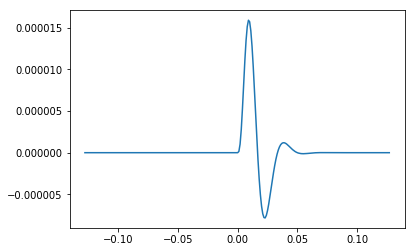

In [36]:
plt.plot(t, w)

In [22]:
print(np.arange(10, dtype=float))
print(np.heaviside(np.arange(10)-5, 0))

[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
[0. 0. 0. 0. 0. 0. 1. 1. 1. 1.]


In [55]:
from collections import namedtuple

def berlage(duration, dt, f, n=2, alpha=180, phi=-np.pi/2, return_t=False):
    """
    Generates a Berlage wavelet with a peak frequency f. Implements

    w(t) = AH(t) t^n \mathrm{e}^{-\alpha t} \cos(2 \pi f_0 t + \phi_0)

    as described in Aldridge, DF (1990), The Berlage wavelet, GEOPHYSICS
    55 (11), p 1508-1511.
    
    If you pass a 1D array of frequencies, you get a wavelet bank in return.

    Args:
        duration (float): The length in seconds of the wavelet.
        dt (float): The sample interval in seconds (often one of  0.001, 0.002,
            or 0.004).
        f (ndarray): Centre frequency of the wavelet in Hz. If a sequence is
            passed, you will get a 2D array in return, one row per frequency.
        n (float): The time exponent; non-negative and real.
        alpha(float): The exponential decay factor; non-negative and real.
        return_t (bool): If True, then the function returns a tuple of
            wavelet, time-basis, where time is the range from -duration/2 to
            duration/2 in steps of dt.

    Returns:
        ndarray. Gabor wavelet(s) with centre frequency f sampled on t.
    """

    f = np.asanyarray(f).reshape(-1, 1)
    t = np.arange(-duration/2, duration/2, dt)
    
    H = np.heaviside(t, 0)
    w = H * t**n * np.exp(-alpha * t) * np.cos(2 * np.pi * f * t + phi)

    w = np.squeeze(w) / np.max(np.abs(w))

    if return_t:
        BerlageWavelet = namedtuple('BerlageWavelet', ['amplitude', 'time'])
        return BerlageWavelet(w, t)
    else:
        return w


In [59]:
w, t = berlage(duration = 0.256, dt = 0.001, f = 30, return_t=True)

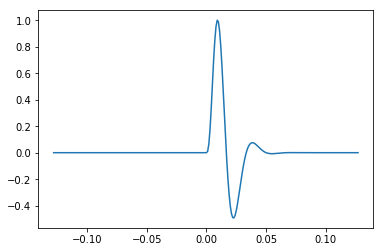

In [60]:
plt.plot(t, w)

This function has been added to [`bruges`](https://github.com/agile-geoscience/bruges) and will be in release 0.4.0. 

## Reproduce Figure 1

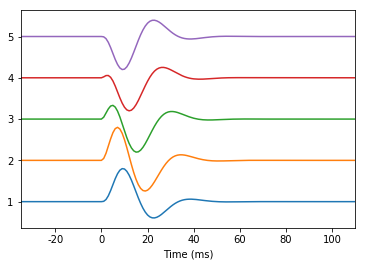

In [89]:
fig, ax = plt.subplots()
for A, phi in enumerate(np.linspace(-np.pi/2, np.pi/2, 5)):
    w, t = berlage(duration=0.256, dt=0.001, f=30, phi=phi, return_t=True)
    ax.plot(t, (A + 1) + 0.8 * w)
ax.set_xlim(-0.035, 0.11)
labels, _ = plt.xticks()
ax.set_xticklabels(map(int, 1001 * labels))
ax.set_xlabel('Time (ms)')
plt.show()